<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/Project/Project2_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 출력 결과를 셀 아래 inline으로 표시
%matplotlib inline

## **데이터셋 불러오기**

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/2022-2 Project/marketing_campaign.csv', sep='\t') # 구분자가 tab 키

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- `Income` 컬럼에만 결측치가 34개 있다.
- Categorical Variable(in People)
  + `Year_Birth`
  + `Education`
  + `Marital_Status`
  + `Complain`
- Numerical Variable(in People)
  + `Income`
  + `Kidhome`
  + `Teenhome`
  + `DT_Customer`(datatime)
  + `Recency`

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#  | **EDA**
___

### **People**
- `ID` : Customer's unique identifier
- `Year_Birth` : Customer's birth year
- `Education`: Customer's education level
- `Marital_Status`: Customer's marital status
- `Income`: Customer's yearly household income
- `Kidhome`: Number of children in customer's household
- `Teenhome`: Number of teenagers in customer's household
- `Dt_Customer`: Date of customer's enrollment with the company
- `Recency`: Number of days since customer's last purchase
- `Complain` : 1 if the customer complained in the last 2 years, 0 otherwise

#### **ID**

In [ ]:
sum(df.duplicated(['ID'])) # ID가 같은 열 개수

0

#### **Year_Birth**
- 해당 컬럼은 고객의 출생연도 데이터를 가지고 있다.
- `Year_Birth`의 최솟값이 1893이다.
- 먼저 히스토그램을 그려보았다.

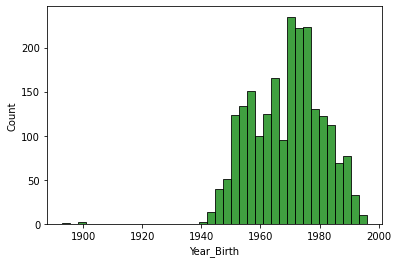

In [ ]:
# Histogram
sns.histplot(df['Year_Birth'], color='g')

- 좀 더 직관적으로 고객의 나이별 분포를 확인하기 위하여, 이번에는 현재 연도와의 차이를 이용하여, 나이를 구하고 10대, 20대, 30대 등 연령대별 고객 분포를 확인해보았다.

In [ ]:
# 기존 데이터프레임 복사
df_age = df.copy()

current_year=2022 # 현재 연도
df_age['Age'] = df_age['Year_Birth'].apply(lambda x : current_year - x) # age 컬럼 생성
df_age['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [ ]:
# 20대, 30대, 40대, 50대, 60대, 70대 이상으로 분류하는 함수
def classify_age(x):
  if x < 30:
    return 'group 20'
  elif x < 40:
    return 'group 30'
  elif x < 50:
    return 'group 40'
  elif x < 60:
    return 'group 50'
  elif x < 70:
    return 'group 60'
  else:
    return 'group over 70'

In [ ]:
df_age['Age_group'] = df_age['Age'].apply(classify_age) # age_group 컬럼 생성
df_age['Age_group'].head()

0    group 60
1    group 60
2    group 50
3    group 30
4    group 40
Name: Age_group, dtype: object

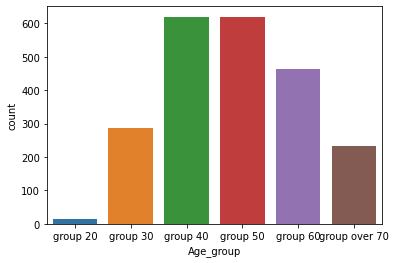

In [ ]:
sns.countplot(data=df_age, x='Age_group', order=['group 20', 'group 30', 'group 40','group 50','group 60', 'group over 70'])
plt.show()

- 40~60대인 고객이 많다.
- 20대인 고객이 적다.
- 이상치가 있는지 확인해보기 위해 박스 그래프를 그려보았다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


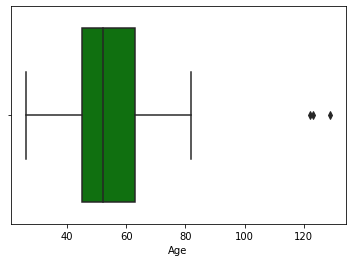

In [ ]:
sns.boxplot(df_age['Age'], color='g')

#### **Education**

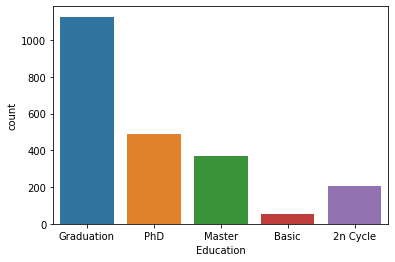

In [ ]:
sns.countplot(data=df, x='Education')
plt.show()

#### **Marital_Status**

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

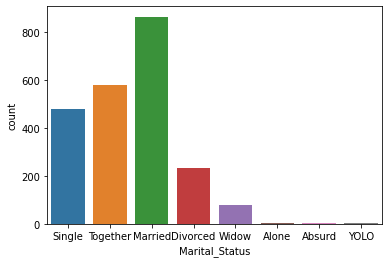

In [ ]:
sns.countplot(data=df, x='Marital_Status')
plt.show()

#### **Income**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


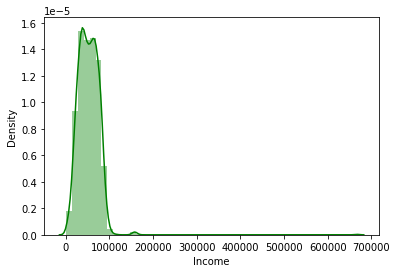

In [ ]:
# Histogram
sns.distplot(df['Income'], color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


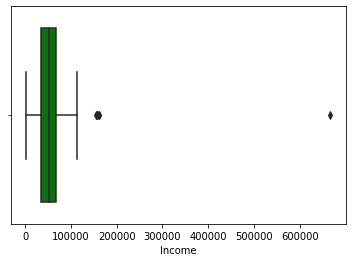

In [ ]:
sns.boxplot(df_age['Income'], color='g')

- 이상치는 제거하고 결측치는 평균으로 처리
- 교육 수준에 따른 소득 수준을 확인하기 위해 산점도를 그려보았다.

In [ ]:
sum(df['Income'].isnull())

24

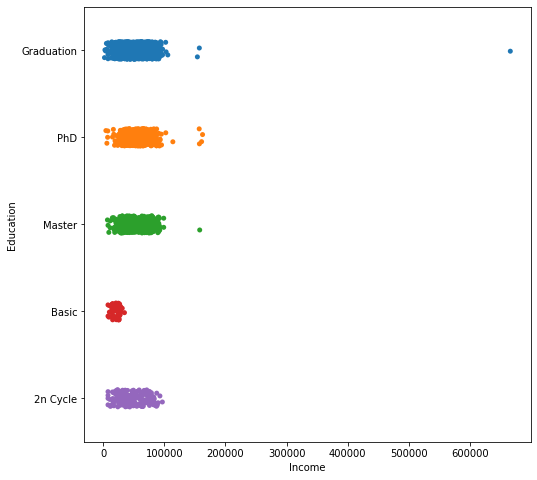

In [ ]:
plt.figure(figsize=(8,8))
sns.stripplot(x='Income', y='Education', data=df)

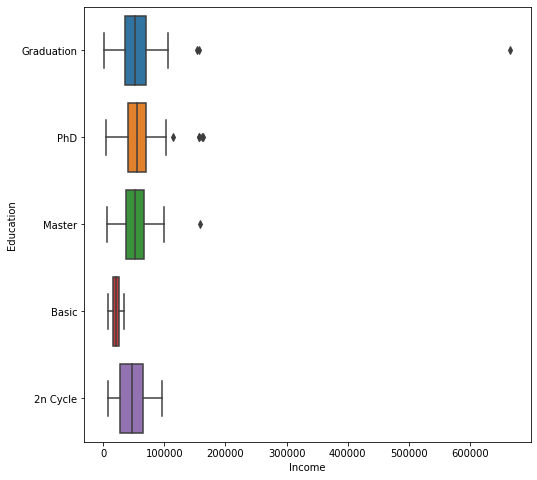

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Income', y='Education', data=df)

#### **Kidhome**

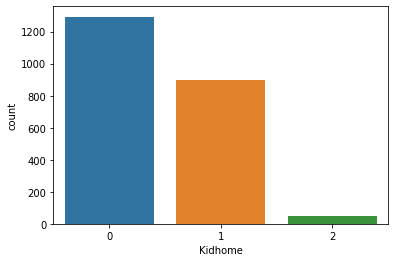

In [ ]:
sns.countplot(data=df, x='Kidhome')
plt.show()

#### **Teenhome**

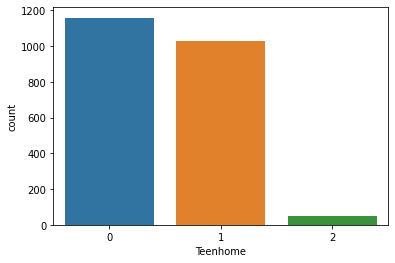

In [ ]:
sns.countplot(data=df, x='Teenhome')
plt.show()

- `KIdHome`와 `Teenhome`을 합쳐서 자녀수 피처를 만든다.

#### **Dt_Customer**
- 회원 기간
- '일-월-연도' 날짜 형식의 데이터로 datetime으로 데이터타입을 변경해주어야 한다.

In [ ]:
df['Dt_Customer'].head() # 일-월-연도

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [ ]:
# datetime으로 변환
from datetime import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
df['Dt_Customer'].head()

0   2012-04-09
1   2014-08-03
2   2013-08-21
3   2014-10-02
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
df['Dt_Customer'].max()

Timestamp('2014-12-06 00:00:00')

In [ ]:
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month

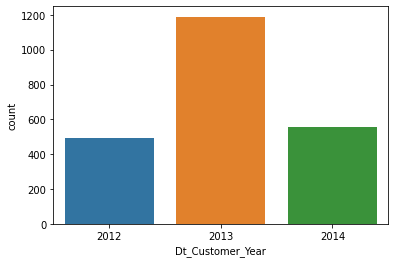

In [ ]:
sns.countplot(data=df, x='Dt_Customer_Year')
plt.show()

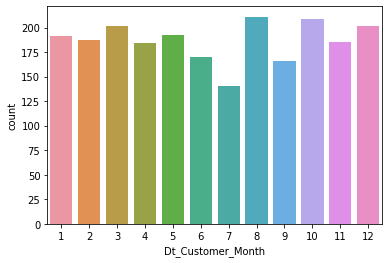

In [ ]:
sns.countplot(data=df, x='Dt_Customer_Month')
plt.show()

#### **Recency**
- 최근 주문일

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


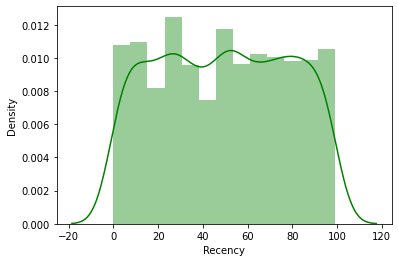

In [ ]:
# Histogram
sns.distplot(df['Recency'], color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


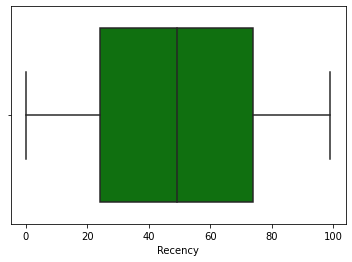

In [ ]:
sns.boxplot(df_age['Recency'], color='g')

In [ ]:
df['Recency'].min()

0

In [ ]:
df['Recency'].max()

99

#### **Complain**
- 1 : 최근 2년 동안 컴플레인을 넣은 고객
- 0 : 그렇지 않은 고객

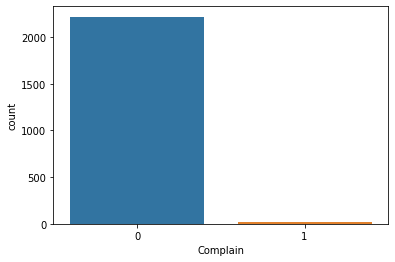

In [ ]:
sns.countplot(data=df, x='Complain')
plt.show()

In [ ]:
# number of customer who complained in last 2 years
sum(df['Complain']==1)

21

- Complain을 넣은 고객이 매우 적다.

### **Products**

#### **MntWines**
: Amount spent on wine in last 2 years

(array([1045.,  325.,  232.,  210.,  142.,   99.,   98.,   45.,   31.,
          13.]),
 array([   0. ,  149.3,  298.6,  447.9,  597.2,  746.5,  895.8, 1045.1,
        1194.4, 1343.7, 1493. ]),
 <a list of 10 Patch objects>)

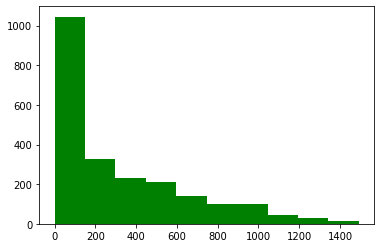

In [ ]:
plt.hist(df['MntWines'], color='g')

In [ ]:
df['MntWines'].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

#### **MntFruits**
: Amount spent on fruits in last 2 years

(array([1469.,  283.,  145.,   95.,   75.,   53.,   48.,   28.,   27.,
          17.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

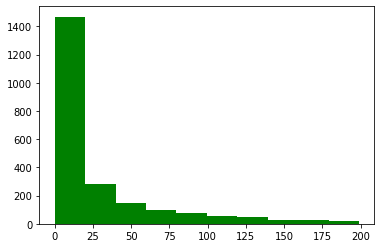

In [ ]:
plt.hist(df['MntFruits'], color='g')

In [ ]:
df['MntFruits'].describe()

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

#### **MntMeatProducts**
: Amount spent on meat in last 2 years

(array([1562.,  274.,  195.,  100.,   78.,   26.,    0.,    0.,    0.,
           5.]),
 array([   0. ,  172.5,  345. ,  517.5,  690. ,  862.5, 1035. , 1207.5,
        1380. , 1552.5, 1725. ]),
 <a list of 10 Patch objects>)

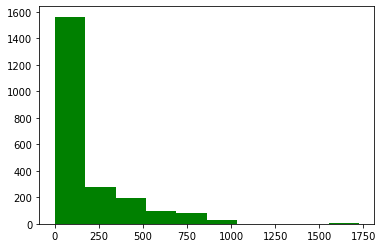

In [ ]:
plt.hist(df['MntMeatProducts'], color='g')

In [ ]:
df['MntMeatProducts'].describe()

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

#### **MntFishProducts**
: Amount spent on fish in last 2 years

(array([1440.,  255.,  160.,  106.,   74.,   68.,   51.,   36.,   32.,
          18.]),
 array([  0. ,  25.9,  51.8,  77.7, 103.6, 129.5, 155.4, 181.3, 207.2,
        233.1, 259. ]),
 <a list of 10 Patch objects>)

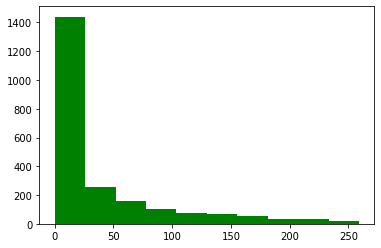

In [ ]:
plt.hist(df['MntFishProducts'], color='g')

In [ ]:
df['MntFishProducts'].describe()

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

#### **MntSweetProducts**
: Amount spent on sweets in last 2 years

(array([1588.,  260.,  132.,   96.,   59.,   55.,   31.,   17.,    0.,
           2.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 10 Patch objects>)

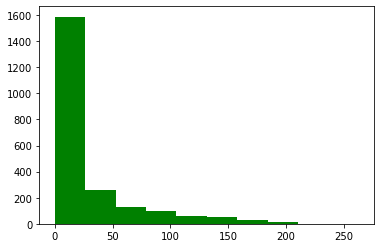

In [ ]:
plt.hist(df['MntSweetProducts'], color='g')

In [ ]:
df['MntSweetProducts'].describe()

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64

#### **MntGoldProds**
: Amount spent on gold in last 2 years

(array([1.397e+03, 3.910e+02, 1.880e+02, 1.060e+02, 7.700e+01, 4.800e+01,
        2.900e+01, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([  0. ,  36.2,  72.4, 108.6, 144.8, 181. , 217.2, 253.4, 289.6,
        325.8, 362. ]),
 <a list of 10 Patch objects>)

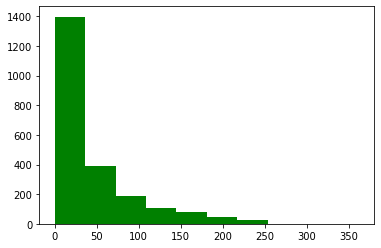

In [ ]:
plt.hist(df['MntGoldProds'], color='g')

In [ ]:
df['MntGoldProds'].describe()

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64

- 전체적으로 왼쪽으로 치우쳐진 분포를 보이고 있다.

### **Promotion**
- `NumDealsPurchases`: Number of purchases made with a discount
- `AcceptedCmp1`: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2`: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3`: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4`: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5`: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- `Response`: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### **NumDealsPurchases**

In [ ]:
df['NumDealsPurchases'].value_counts()

1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64

In [ ]:
df['NumDealsPurchases'].describe()

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

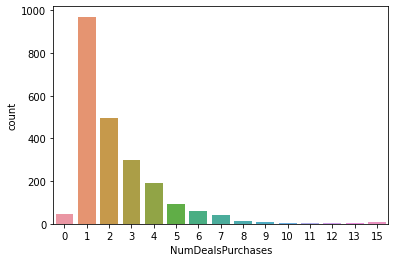

In [ ]:
sns.countplot(data=df,x='NumDealsPurchases')

In [ ]:
sum(df['NumDealsPurchases']==0)/2240 *100

2.0535714285714284

#### **AcceptedCmp1**

In [ ]:
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

(0.0, 2400.0)

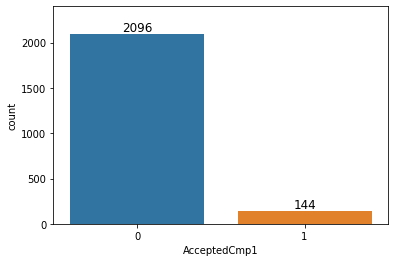

In [ ]:
ax = sns.countplot(data=df, x='AcceptedCmp1')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **AcceptedCmp2**

In [ ]:
df['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

(0.0, 2400.0)

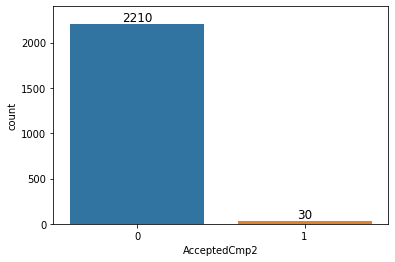

In [ ]:
ax=sns.countplot(data=df, x='AcceptedCmp2')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **AcceptedCmp3**

In [ ]:
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

(0.0, 2400.0)

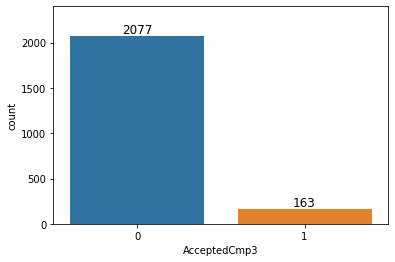

In [ ]:
ax=sns.countplot(data=df, x='AcceptedCmp3')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **AcceptedCmp4**

In [ ]:
df['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

(0.0, 2400.0)

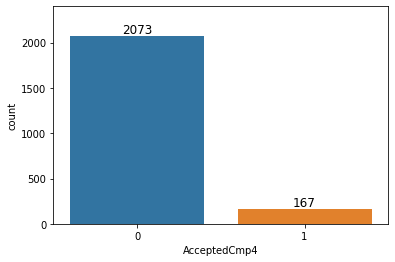

In [ ]:
ax=sns.countplot(data=df, x='AcceptedCmp4')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **AcceptedCmp5**

In [ ]:
df['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

(0.0, 2400.0)

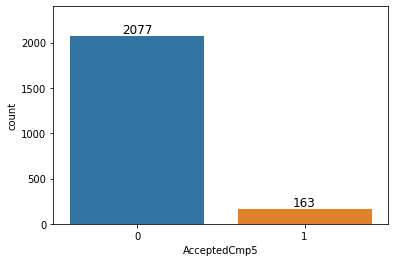

In [ ]:
ax=sns.countplot(data=df, x='AcceptedCmp5')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2400)

#### **Response**

In [ ]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

(0.0, 2100.0)

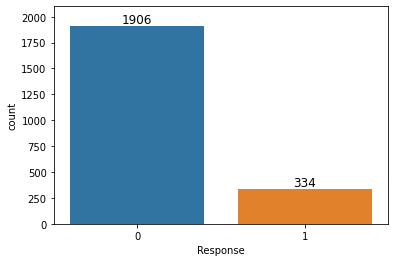

In [ ]:
ax=sns.countplot(data=df, x='Response')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 30 , height, ha = 'center', size = 12)
ax.set_ylim(0, 2100)

- 전체적으로 Campaign에 참여하지 않는 고객의 수가 훨씬 많다.

### **Place**
- `NumWebPurchases`: Number of purchases made through the company’s website
- `NumCatalogPurchases`: Number of purchases made using a catalogue
- `NumStorePurchases`: Number of purchases made directly in stores
- `NumWebVisitsMonth`: Number of visits to company’s website in the last month

#### **NumWebPurchases**

In [ ]:
df['NumWebPurchases'].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

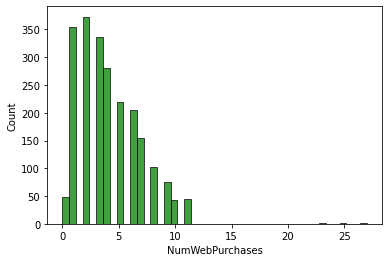

In [ ]:
# Histogram
sns.histplot(df['NumWebPurchases'], color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


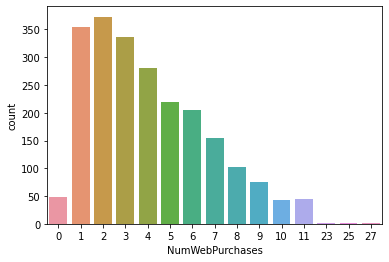

In [ ]:
sns.countplot(df['NumWebPurchases'])

#### **NumCatalogPurchases**

In [ ]:
df['NumCatalogPurchases'].describe()

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

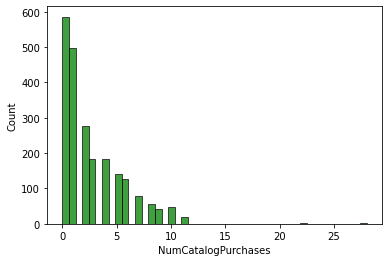

In [ ]:
# Histogram
sns.histplot(df['NumCatalogPurchases'], color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


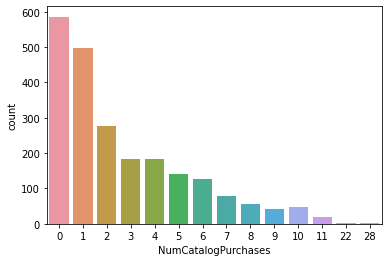

In [ ]:
sns.countplot(df['NumCatalogPurchases'])

#### **NumStorePurchases**

In [ ]:
df['NumStorePurchases'].describe()

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

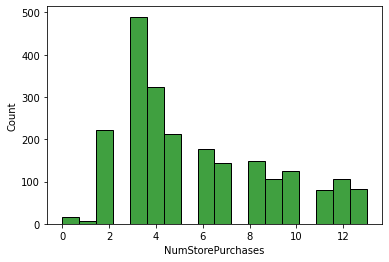

In [ ]:
# Histogram
sns.histplot(df['NumStorePurchases'], color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


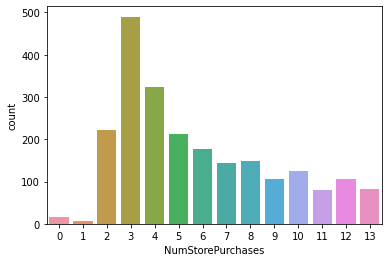

In [ ]:
sns.countplot(df['NumStorePurchases'])

#### **NumWebVisitsMonth**

In [ ]:
df['NumWebVisitsMonth'].describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


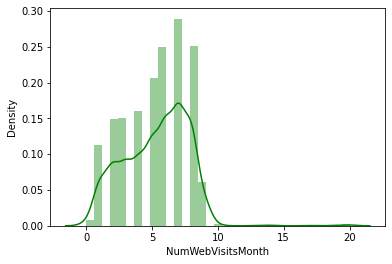

In [ ]:
# Histogram
sns.distplot(df['NumWebVisitsMonth'], color='g')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


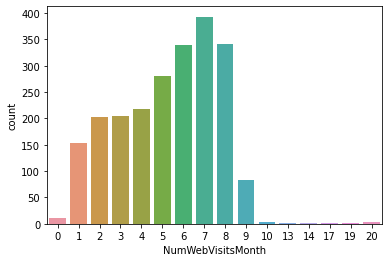

In [ ]:
sns.countplot(df['NumWebVisitsMonth'])

In [ ]:
sum(df['NumWebVisitsMonth']==0)

11

# | **RFM 기반 군집화**
___

## **데이터 전처리 및 가공**

### **RFM 기반으로 데이터 가공**
* Recency: 주문 기간
* Frequency :  주문 횟수
* Monetary : 주문 금액
- 아래와 같이 기존 컬럼들을 재구성하여, Recency, Frequency, Monetary 컬럼을 생성한다.
  1. Recency : 기존 `Recency` 컬럼을 그대로 사용한다.
  2. Frequency : `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` 컬럼을 더하여 생성한다.
  3. Monetary : 각 상품별 주문 금액을 의미하는 `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds` 컬럼을 모두 더하여 생성한다.
  


In [ ]:
# 빈 데이터 프레임 생성
df_RFM = pd.DataFrame(columns={'ID', 'Recency', 'Frequency', 'Monetary'})
df_RFM = df_RFM[['ID','Recency', 'Frequency', 'Monetary']]
df_RFM

,ID,Recency,Frequency,Monetary


In [ ]:
# ID
df_RFM['ID'] = df['ID'].copy()
df_RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,NaN,NaN,NaN
1,2174,NaN,NaN,NaN
2,4141,NaN,NaN,NaN
3,6182,NaN,NaN,NaN
4,5324,NaN,NaN,NaN


In [ ]:
# Recency
df_RFM['Recency'] = df['Recency'].copy()
df_RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,58,NaN,NaN
1,2174,38,NaN,NaN
2,4141,26,NaN,NaN
3,6182,26,NaN,NaN
4,5324,94,NaN,NaN


In [ ]:
# Frequency
df_RFM['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df_RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,58,22,NaN
1,2174,38,4,NaN
2,4141,26,20,NaN
3,6182,26,6,NaN
4,5324,94,14,NaN


In [ ]:
# Monetary
df_RFM['Monetary'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df_RFM.head()

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422


### **각 컬럼별 이상치 제거**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


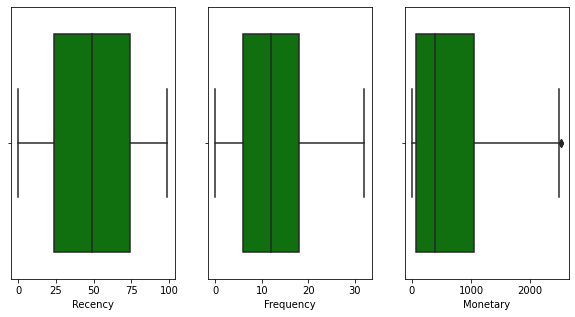

In [ ]:
# boxplot
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
sns.boxplot(df_RFM['Recency'], color='g')

plt.subplot(1, 3, 2)
sns.boxplot(df_RFM['Frequency'], color='g')

plt.subplot(1, 3, 3)
sns.boxplot(df_RFM['Monetary'], color='g')

plt.show()

- Monetary 컬럼에만 이상치가 존재한다.

In [ ]:
Q1 = df_RFM['Monetary'].quantile(0.25)
Q3 = df_RFM['Monetary'].quantile(0.75)
IQR = Q3-Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

idx = list(df_RFM[(df_RFM['Monetary'] > upper) | (df_RFM['Monetary']<lower)].index)
df_RFM.drop(idx, axis=0, inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


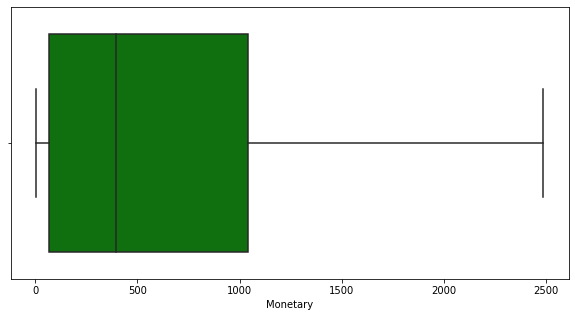

In [ ]:
# boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df_RFM['Monetary'], color='g')
plt.show()

- 이상치가 제거된 것을 확인할 수 있다.

### **각 컬럼별 분포 확인**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

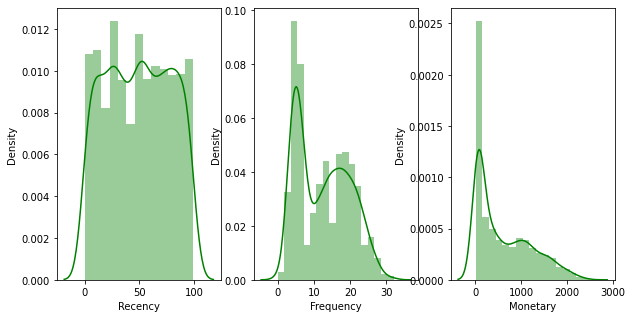

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 3, 1)
sns.distplot(df_RFM['Recency'], color='g')

plt.subplot(1, 3, 2)
sns.distplot(df_RFM['Frequency'], color='g')

plt.subplot(1, 3, 3)
sns.distplot(df_RFM['Monetary'], color='g')

plt.show()

- Frequency와 Monetary 컬럼에 로그 변환을 적용한다.

In [ ]:
# 로그 변환
df_RFM['Frequency_log'] = np.log1p(df_RFM['Frequency'])
df_RFM['Monetary_log'] = np.log1p(df_RFM['Monetary'])

### **스케일링**

In [ ]:
from sklearn.preprocessing import StandardScaler

X_features = df_RFM[['ID','Recency', 'Frequency_log', 'Monetary_log']].values
scaler = StandardScaler()
scaler.fit(X_features)
X_features_scaled = scaler.transform(X_features)

## **K-Means 알고리즘을 이용한 군집화**

#### **군집 개수별 실루엣 계수 시각화 함수**

In [ ]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        km=KMeans(n_clusters=n_cluster, random_state=0)
        cluster_labels = km.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#### **군집 개수 최적화**
- Elbow Method, Silhouette 점수를 이용하여 최적의 군집 개수를 찾아보자.
- Elbow Method : Cluster 간의 거리 합을 의미하는 inertia가 급격히 떨어지는 지점의 K 값을 군집의 개수로 사용한다.

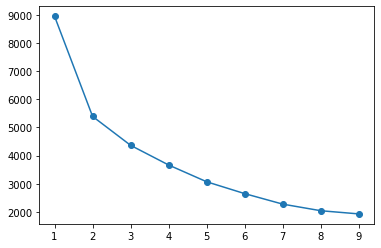

In [ ]:
# Elbow Method
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,10):
  km=KMeans(n_clusters=i)
  km.fit(X_features_scaled)
  inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.show()

- Silhouette score 점수가 가장 좋은 군집 개수를 확인한다.
- 또한 각 군집 개수별 실루엣 계수를 시각화하였다.

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
n_range=list(range(1, 10))

best_n=0
best_ss=0
for n in n_range:
  km=KMeans(n_clusters=n+1, random_state=0)
  clusters=km.fit_predict(X_features_scaled)

  score=silhouette_score(X_features_scaled, clusters)
  if score>best_ss:
    best_n=n
    best_ss=score

print('best cluster num:', best_n+1, ' with best silhouette score: ', best_ss)

best cluster num: 2  with best silhouette score:  0.3636798313095011


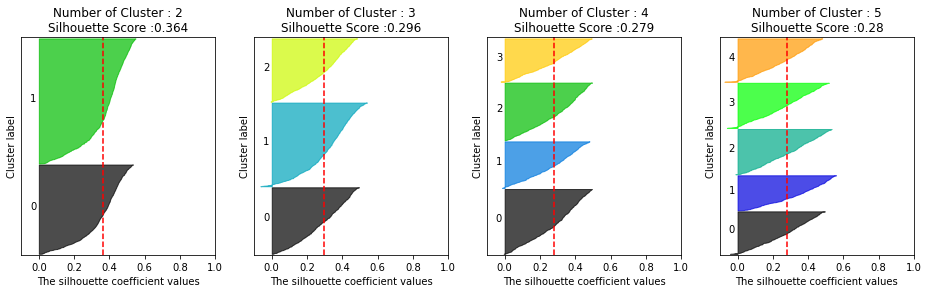

In [ ]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

- 군집 개수를 2개로 설정하기로 함

#### **군집화**

In [ ]:
km=KMeans(n_clusters=2)
km.fit(X_features_scaled)

df_RFM['cluster_KMeans']=km.predict(X_features_scaled)

In [ ]:
df_RFM['cluster_KMeans'].value_counts()

0    1305
1     932
Name: cluster_KMeans, dtype: int64

## **K-Means 알고리즘을 이용한 군집화 결과 시각화**

In [ ]:
fig = plt.figure()

x=df_RFM['Recency']
y=df_RFM['Frequency']
z=df_RFM['Monetary']

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


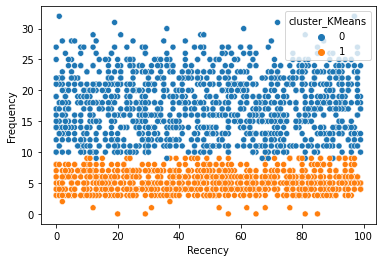

In [ ]:
# Recency & Frequency
sns.scatterplot(x, y, hue=df_RFM['cluster_KMeans'])
plt.show()

- Frequency가 낮은 그룹과 높은 그룹으로 군집화되었다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


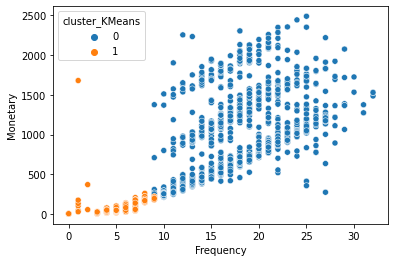

In [ ]:
# Frequency & Monetary
sns.scatterplot(y,z, hue=df_RFM['cluster_KMeans'])
plt.show()

- Frequency와 Monetary 값이 모두 큰 군집과 두 값이 모두 작은 군집으로 군집화되었다.
- Frequency와 Monetary 컬럼 간에 선형 관계가 있는 것으로 보인다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


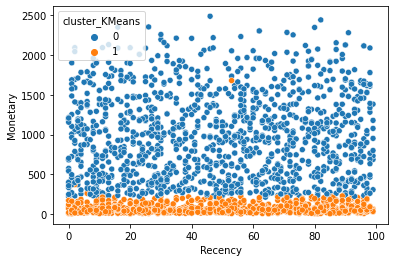

In [ ]:
# Recency & Monetary
sns.scatterplot(x, z, hue=df_RFM['cluster_KMeans'])
plt.show()

- Monetary 값이 큰 군집과 작은 군집으로 군집화 되었다.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

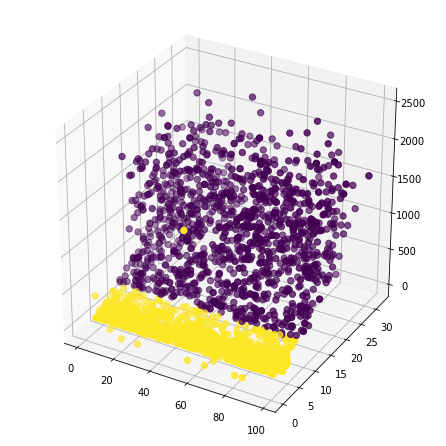

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# plot
ax.scatter(x, y, z, s=40, c=df_RFM['cluster_KMeans'], marker='o')
plt.show()

## **GMM 알고리즘을 이용한 군집화**

In [ ]:
from sklearn.mixture import GaussianMixture

#### **군집 개수별 실루엣 계수 시각화 함수**

In [ ]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.mixture import GaussianMixture
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = GaussianMixture(n_components=n_cluster)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#### **군집 개수 최적화**

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
n_range=list(range(1, 10))

best_n=0
best_ss=0
for n in n_range:
  gm=GaussianMixture(n_components=n+1)
  gm.fit(X_features_scaled)
  clusters=gm.predict(X_features_scaled)

  score=silhouette_score(X_features_scaled, clusters)
  if score>best_ss:
    best_n=n
    best_ss=score

print('best cluster num:', best_n+1, ' with best silhouette score: ', best_ss)

best cluster num: 2  with best silhouette score:  0.31328737493036923


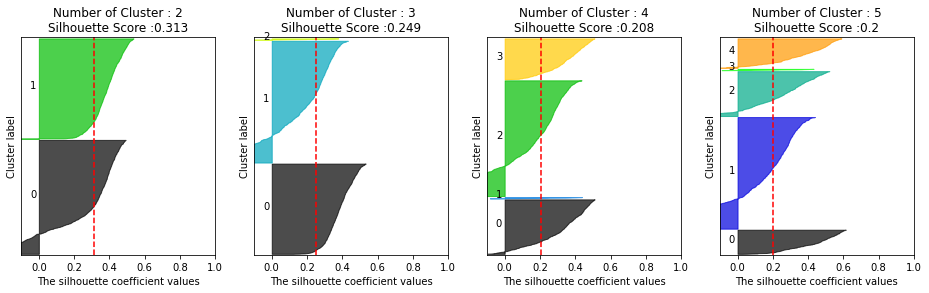

In [ ]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)

- 군집 개수를 2개로 설정하기로 함

#### **군집화**

In [ ]:
gm = GaussianMixture(n_components=2)
gm.fit(X_features_scaled)
gmm_labels = gm.predict(X_features_scaled)

df_RFM['cluster_GMM'] = gmm_labels

In [ ]:
df_RFM['cluster_GMM'].value_counts()

1    1189
0    1048
Name: cluster_GMM, dtype: int64

## **GMM 알고리즘을 이용한 군집화 결과 시각화**

In [ ]:
fig = plt.figure()

x=df_RFM['Recency']
y=df_RFM['Frequency']
z=df_RFM['Monetary']

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


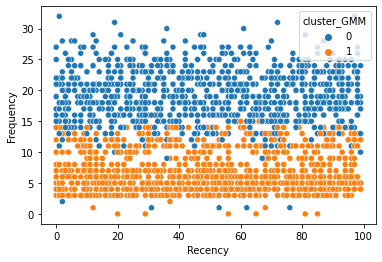

In [ ]:
# Recency & Frequency
sns.scatterplot(x, y, hue=df_RFM['cluster_GMM'])
plt.show()

- Frequency가 낮은 그룹과 높은 그룹으로 군집화되었다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


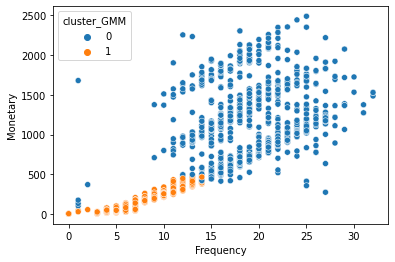

In [ ]:
# Frequency & Moentary
sns.scatterplot(y,z, hue=df_RFM['cluster_GMM'])
plt.show()

- Frequency와 Monetary 값이 모두 큰 군집과 두 값이 모두 작은 군집으로 군집화되었다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


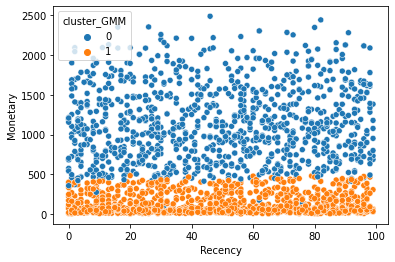

In [ ]:
# Recency & Monetary
sns.scatterplot(x, z, hue=df_RFM['cluster_GMM'])
plt.show()

- Monetary 값이 큰 군집과 작은 군집으로 군집화 되었다.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

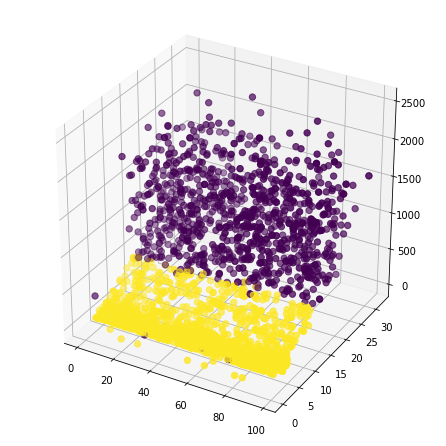

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# plot
ax.scatter(x, y, z, s=40, c=df_RFM['cluster_GMM'], marker='o')
plt.show()

# | **People과 RFM 컬럼 기반 군집화**
___

## **데이터 전처리 및 가공**

### **데이터 가공을 위한 데이터프레임 복사**
- People 속성에 해당하는 컬럼들만 추출
- 이후 해당 데이터 프레임에 RFM 기반의 Frequency와 Monetary 컬럼을 추가할 예정

In [ ]:
df_People = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer']].copy()
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19


### **RFM 기반으로 데이터 가공**
* Recency: 주문 기간
* Frequency :  주문 횟수
* Monetary : 주문 금액


In [ ]:
# Recency
df_People['Recency'] = df['Recency'].copy()
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94


In [ ]:
# Frequency
df_People['Frequency'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,22
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,4
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,20
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,6
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,14


In [ ]:
# Monetary
df_People['Monetary'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency,Monetary
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,22,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,4,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,20,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,6,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,14,422


### **Year_Birth 컬럼을 Age 컬럼으로 변환**


In [ ]:
df_People['Age'] = 2022 - df['Year_Birth']
df_People.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency,Monetary,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,22,1617,65
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,4,27,68
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,20,776,57
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,6,53,38
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,14,422,41


In [ ]:
df_People.drop('Year_Birth', axis=1, inplace=True)

### **Education 컬럼 그룹화**
범주의 개수가 많아, 고등학교 졸업, 대학교 졸업, 석박사 이상으로 그룹화

In [ ]:
# Education 컬럼 그룹화 및 라벨 인코딩
def Edu_level(x):
  if (x=='2n Cycle') or (x=='Basic'):
    return 0
  elif x=='Graduation':
    return 1
  else:
    return 2

In [ ]:
df_People['Education']=df_People['Education'].apply(Edu_level)
df_People.head(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency,Monetary,Age
0,5524,1,Single,58138.0,0,0,2012-04-09,58,22,1617,65
1,2174,1,Single,46344.0,1,1,2014-08-03,38,4,27,68
2,4141,1,Together,71613.0,0,0,2013-08-21,26,20,776,57


In [ ]:
df_People['Education'].value_counts()

1    1127
2     856
0     257
Name: Education, dtype: int64

### **Marital_Status 컬럼 그룹화**
동거인 유무에 따라서, 없으면 0, 있으면 1

In [ ]:
def Mari_level(x):
  if (x=='Married') or (x=='Together'):
    return 1
  else:
    return 0

In [ ]:
df_People['Marital_Status']=df_People['Marital_Status'].apply(Mari_level)
df_People.head(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Frequency,Monetary,Age
0,5524,1,0,58138.0,0,0,2012-04-09,58,22,1617,65
1,2174,1,0,46344.0,1,1,2014-08-03,38,4,27,68
2,4141,1,1,71613.0,0,0,2013-08-21,26,20,776,57


In [ ]:
df_People['Marital_Status'].value_counts()

1    1444
0     796
Name: Marital_Status, dtype: int64

### **Income 컬럼 결측치 처리**
해당 컬럼의 분포가 정규 분포에 가까워 평균값으로 대체

In [ ]:
mu = np.mean(df_People['Income'])
df_People['Income'].fillna(mu, inplace=True)

In [ ]:
# 결측치가 없어졌는지 확인
sum(df_People['Income'].isnull())

0

### **자녀 수를 나타내는 Children 컬럼 생성**
Kidhome과 Teenhome 컬럼을 이용하여 자녀 수를 나타내는 변수 생성

In [ ]:
df_People['Children']=df_People['Kidhome']+df_People['Teenhome']
df_People.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

### **Dt_Customer 컬럼 변환**
- 해당 컬럼은 날짜 데이터
- datetime으로 변환 후, 기간으로 변환하여 `Days_Customer` 컬럼에 저장

In [ ]:
# datetime으로 변환
from datetime import datetime
df_People['Dt_Customer'] = pd.to_datetime(df_People['Dt_Customer'])

In [ ]:
Recent = df_People['Dt_Customer'].max()
df_People['Days_Customer'] = (Recent - df_People['Dt_Customer']).dt.days
df_People.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Frequency,Monetary,Age,Children,Days_Customer
0,5524,1,0,58138.0,2012-04-09,58,22,1617,65,0,971
1,2174,1,0,46344.0,2014-08-03,38,4,27,68,2,125
2,4141,1,1,71613.0,2013-08-21,26,20,776,57,0,472
3,6182,1,1,26646.0,2014-10-02,26,6,53,38,1,65
4,5324,2,1,58293.0,2014-01-19,94,14,422,41,1,321


In [ ]:
df_People.drop('Dt_Customer', axis=1, inplace=True)

### **각 컬럼별 이상치 제거**

In [ ]:
df_People.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2240 non-null   int64  
 1   Education       2240 non-null   int64  
 2   Marital_Status  2240 non-null   int64  
 3   Income          2240 non-null   float64
 4   Recency         2240 non-null   int64  
 5   Frequency       2240 non-null   int64  
 6   Monetary        2240 non-null   int64  
 7   Age             2240 non-null   int64  
 8   Children        2240 non-null   int64  
 9   Days_Customer   2240 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 175.1 KB


In [ ]:
numeric_features = ['ID', 'Income', 'Recency', 'Age', 'Days_Customer', 'Frequency', 'Monetary']
categorical_index = [1, 2, 6]

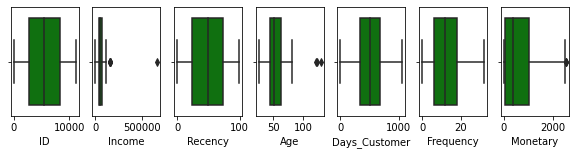

In [ ]:
plt.figure(figsize=(10,2))
i=1

for fea in numeric_features :
    plt.subplot(1, 7,i)
    sns.boxplot(x=fea, data=df_People, color='g')
    i+=1
plt.show()

- `Income`과 `Age` 컬럼에 이상치 존재

In [ ]:
def remove_IQR(col):
  Q1 = df_People[col].quantile(0.25)
  Q3 = df_People[col].quantile(0.75)
  IQR = Q3-Q1

  upper = Q3 + 1.5*IQR
  lower = Q1 - 1.5*IQR

  idx = list(df_People[(df_People[col] > upper) | (df_People[col]<lower)].index)
  df_People.drop(idx, axis=0, inplace=True)

In [ ]:
remove_IQR('Income')
remove_IQR('Age')
remove_IQR('Monetary')

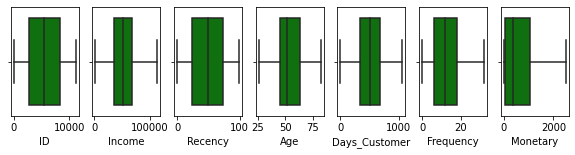

In [ ]:
plt.figure(figsize=(10,2))
i=1

for fea in numeric_features :
    plt.subplot(1, 7, i)
    sns.boxplot(x=fea, data=df_People, color='g')
    i+=1
plt.show()

### **각 컬럼별 분포 확인 후 로그 변환**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

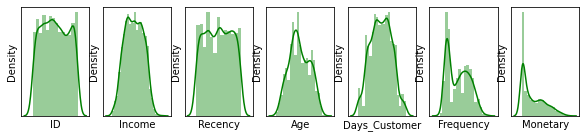

In [ ]:
plt.figure(figsize=(10,2))
i=1

for fea in numeric_features :
    plt.subplot(1, 7, i)
    sns.distplot(df_People[fea], color='g')
    plt.xticks([])
    plt.yticks([])
    i+=1
plt.show()

In [ ]:
df_People_log= df_People.copy()
for fea in numeric_features :
  df_People_log[fea] = np.log1p(df_People[fea])

### **스케일링**

In [ ]:
df_People_scaled = df_People_log.copy()
df_People_scaled.head(3)

,ID,Education,Marital_Status,Income,Recency,Frequency,Monetary,Age,Children,Days_Customer
0,8.617039,1,0,10.970592,4.077537,3.135494,7.388946,4.189655,0,6.879356
1,7.684784,1,0,10.743869,3.663562,1.609438,3.332205,4.234107,2,4.836282
2,8.328934,1,1,11.179046,3.295837,3.044522,6.655440,4.060443,0,6.159095


In [ ]:
def normalize(col):
  return (df_People[col]-df_People[col].mean())/np.sqrt(df_People[col].var())

In [ ]:
for fea in numeric_features:
  df_People_scaled[fea] = normalize(fea)

In [ ]:
df_People_scaled.head(3)

,ID,Education,Marital_Status,Income,Recency,Frequency,Monetary,Age,Children,Days_Customer
0,-0.020658,1,0,0.318967,0.306695,1.318186,1.697746,1.014611,0,1.974144
1,-1.052695,1,0,-0.254456,-0.383950,-1.189509,-0.964281,1.271251,2,-1.666855
2,-0.446720,1,1,0.974119,-0.798338,1.039553,0.289718,0.330236,0,-0.173443


In [ ]:
# 컬럼 순서 재정렬
reorder_col = ['ID', 'Education', 'Marital_Status', 'Income', 'Recency', 'Age', 'Children', 'Days_Customer', 'Frequency', 'Monetary']

df_People_scaled = df_People_scaled[reorder_col]
df_People_scaled.head()

,ID,Education,Marital_Status,Income,Recency,Age,Children,Days_Customer,Frequency,Monetary
0,-0.020658,1,0,0.318967,0.306695,1.014611,0,1.974144,1.318186,1.697746
1,-1.052695,1,0,-0.254456,-0.383950,1.271251,2,-1.666855,-1.189509,-0.964281
2,-0.446720,1,1,0.974119,-0.798338,0.330236,0,-0.173443,1.039553,0.289718
3,0.182052,1,1,-1.212170,-0.798338,-1.295155,1,-1.925082,-0.910876,-0.920751
4,-0.082272,2,1,0.326503,1.549857,-1.038515,1,-0.823314,0.203655,-0.302960


In [ ]:
df_People_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2226 non-null   float64
 1   Education       2226 non-null   int64  
 2   Marital_Status  2226 non-null   int64  
 3   Income          2226 non-null   float64
 4   Recency         2226 non-null   float64
 5   Age             2226 non-null   float64
 6   Children        2226 non-null   int64  
 7   Days_Customer   2226 non-null   float64
 8   Frequency       2226 non-null   float64
 9   Monetary        2226 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 191.3 KB


In [ ]:
X = df_People_scaled.values

## **K-prototypes을 이용한 군집화**

In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **군집 개수별 실루엣 계수 시각화 함수**

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_clu in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KPrototypes(n_clusters=n_clu, init='Huang', random_state=42, n_jobs=-1)
        cluster_labels = clusterer.fit_predict(X_features, categorical=categorical_index)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_clu)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_clu + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_clu):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clu)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

#### **군집 개수 최적화**

In [ ]:
# Silhouette score
from sklearn.metrics import silhouette_score
n_range=list(range(1, 10))

best_n=0
best_ss=0
for n in n_range:
  kpro = KPrototypes(n_clusters=n+1)
  clusters=kpro.fit_predict(X, categorical=categorical_index)

  score=silhouette_score(X, clusters)
  if score>best_ss:
    best_n=n
    best_ss=score

print('best cluster num:', best_n+1, ' with best silhouette score: ', best_ss)

best cluster num: 2  with best silhouette score:  0.2429165623395034


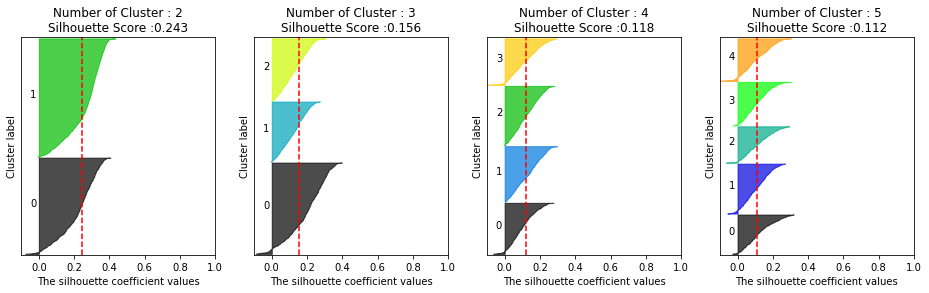

In [ ]:
visualize_silhouette([2, 3, 4, 5], X)

- 군집 개수를 2개로 설정하였다.

#### **군집화**

In [ ]:
KPro = KPrototypes(n_clusters=2, init='Huang', random_state=42, n_jobs=-1)
cluster_labels = KPro.fit_predict(X, categorical=categorical_index)

In [ ]:
df_People['cluster'] = KPro.labels_

In [ ]:
df_People.head(3)

,ID,Education,Marital_Status,Income,Recency,Frequency,Monetary,Age,Children,Days_Customer,cluster
0,5524,1,0,58138.0,58,22,1617,65,0,971,0
1,2174,1,0,46344.0,38,4,27,68,2,125,1
2,4141,1,1,71613.0,26,20,776,57,0,472,0


## **K-prototypes 알고리즘을 이용한 군집화 결과 시각화**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

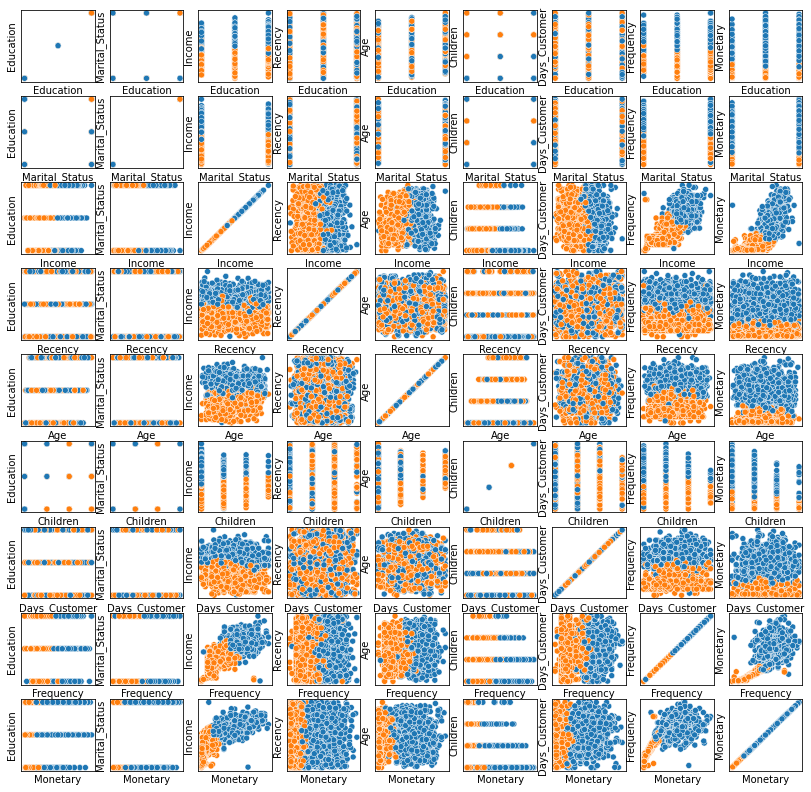

In [ ]:
plt.figure(figsize=(14, 14))
col_list = ['Education','Marital_Status', 'Income','Recency', 'Age', 'Children','Days_Customer', 'Frequency', 'Monetary']
i=1

for col1 in col_list:
  for col2 in col_list:
    plt.subplot(9, 9,i)
    sns.scatterplot(df_People[col1], df_People[col2], hue=df_People['cluster'], legend=False)
    plt.xticks([])
    plt.yticks([])
    i+=1
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

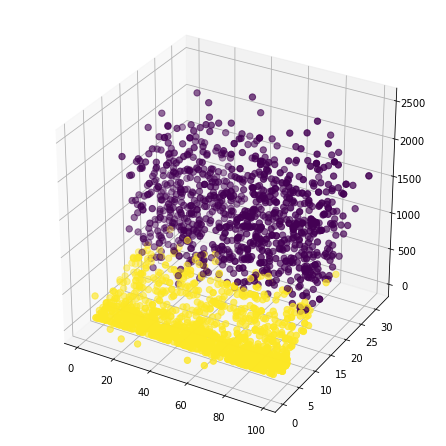

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
x=df_People['Recency']
y=df_People['Frequency']
z=df_People['Monetary']

# plot
ax.scatter(x, y, z, s=40, c=df_People['cluster'], marker='o')

- `Income`, `Frequency`, `Monetary` 컬럼을 기준으로 군집화가 잘 되어 해당 컬럼의 그래프를 따로 분리하여 확인해보았다.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

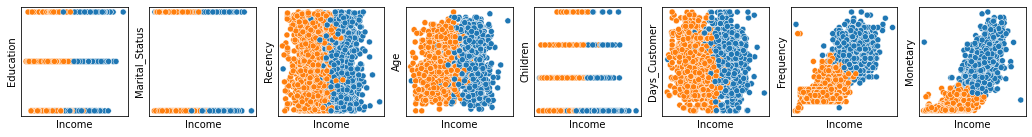

In [ ]:
# Income
fea = 'Income'
col_list = ['Education','Marital_Status', 'Income','Recency', 'Age', 'Children','Days_Customer', 'Frequency', 'Monetary']
i=1
plt.figure(figsize=(18, 2))

for col in col_list:
    if col!= fea: # 자기 자신 제외
      plt.subplot(1,8,i)
      sns.scatterplot(df_People[fea], df_People[col], hue=df_People['cluster'], legend=False)
      i+=1
    plt.xticks([])
    plt.yticks([])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

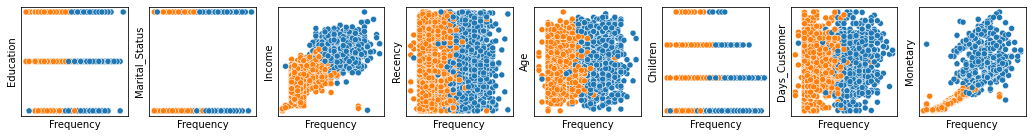

In [ ]:
# Frequency
fea = 'Frequency'
col_list = ['Education','Marital_Status', 'Income','Recency', 'Age', 'Children','Days_Customer', 'Frequency', 'Monetary']
i=1
plt.figure(figsize=(18, 2))

for col in col_list:
    if col!= fea: # 자기 자신 제외
      plt.subplot(1,8,i)
      sns.scatterplot(df_People[fea], df_People[col], hue=df_People['cluster'], legend=False)
      i+=1
    plt.xticks([])
    plt.yticks([])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

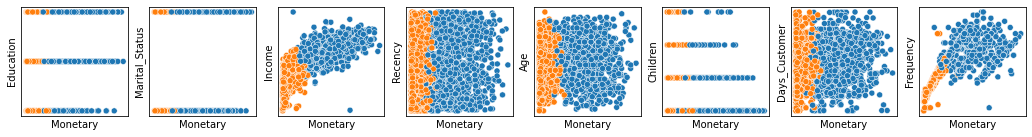

In [ ]:
# Monetary
fea = 'Monetary'
col_list = ['Education','Marital_Status', 'Income','Recency', 'Age', 'Children','Days_Customer', 'Frequency', 'Monetary']
i=1
plt.figure(figsize=(18, 2))

for col in col_list:
    if col!= fea: # 자기 자신 제외
      plt.subplot(1,8,i)
      sns.scatterplot(df_People[fea], df_People[col], hue=df_People['cluster'], legend=False)
      i+=1
    plt.xticks([])
    plt.yticks([])

plt.show()